<a href="https://colab.research.google.com/github/SharmaKanishkaa/Vehicle-Price-Prediction-with-Linear-Regression-and-Regularization-/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [ ]:
# 1. Load or create a dataset
data = pd.DataFrame({
    'X': np.random.rand(100),    # Random independent variable (feature)
    'Y': np.random.rand(100) * 10  # Random dependent variable (target)
})
# Reshape the feature matrix into 2D (required by linear regression)
X = data[['X']].values
Y = data['Y'].values

In [ ]:
# 2. Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Linear Regression

In [ ]:
class Linear_Regression():

    def __init__(self, learning_rate, no_of_iterations):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations

    # Fit function to train the model
    def fit(self, X, Y):
        # Number of training examples(rows) and features(columns)
        self.m, self.n = X.shape

        # Initiating the weight and bias
        self.w = np.zeros(self.n) # weights as matrix as theyre equal to features
        self.b = 0 # there is only one bias so directly initiating it

        # Storing input data
        self.X = X
        self.Y = Y

        # Implementing Gradient Descent for Optimization
        for i in range(self.no_of_iterations):
            self.update_weights()

    # Function to update weights in gradient descent
    def update_weights(self):
        Y_prediction = self.predict(self.X)

        # Calculate gradients
        dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m
        db = - 2 * np.sum(self.Y - Y_prediction) / self.m

        # Updating the weights
        self.w -= self.learning_rate * dw
        self.b -= self.learning_rate * db

    # Line function for prediction
    def predict(self, X):
        return X.dot(self.w) + self.b

In [ ]:
# 3. Initialize and train the Linear Regression model (from scratch)
model = Linear_Regression(learning_rate=0.01, no_of_iterations=1000)
model.fit(X_train, Y_train)

In [ ]:
# 4. Make predictions on the test set
Y_pred_custom = model.predict(X_test)

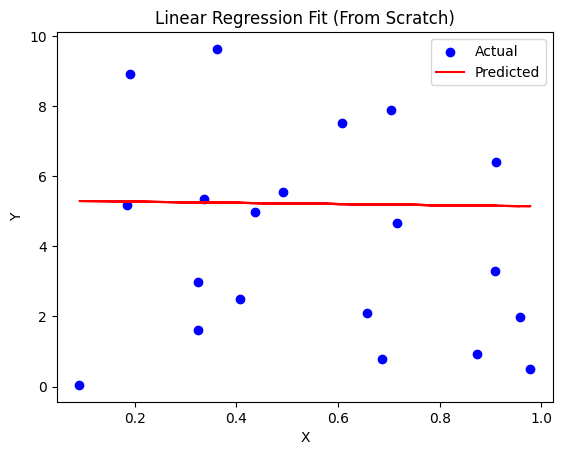

In [ ]:
# 5. Visualize the results
plt.scatter(X_test, Y_test, color='blue', label='Actual')
plt.plot(X_test, Y_pred_custom, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Fit (From Scratch)')
plt.legend()
plt.show()

In [ ]:
# 6. Print the model's learned weight and bias
print(f"Learned Weight: {model.w[0]}")
print(f"Learned Bias: {model.b}")

Learned Weight: 0.7001164945777844
Learned Bias: 4.81697688400544


## Sklearn implementation

In [ ]:
# 3. Initialize and train the Linear Regression model using scikit-learn
model = LinearRegression()
model.fit(X_train, Y_train)

# 4. Make predictions on the test set
Y_pred_sklearn = model.predict(X_test)

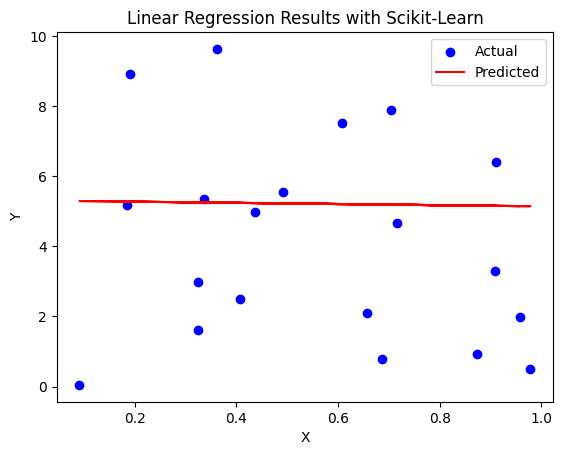

In [ ]:
# 5. Visualize the results
plt.scatter(X_test, Y_test, color='blue', label='Actual')
plt.plot(X_test, Y_pred_sklearn, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Results with Scikit-Learn')
plt.legend()
plt.show()

In [ ]:
# 6. Print the model's learned weight and bias
print(f"Learned Weight: {model.coef_[0]}")
print(f"Learned Bias: {model.intercept_}")

Learned Weight: -0.16745281442487453
Learned Bias: 5.311644870369869


# Regularization

https://medium.com/@eltronicsvilla17/regularization-methods-7a6b6e90179a

https://arunm8489.medium.com/an-overview-on-regularization-f2a878507eae

Regularization helps to overcoming a problem of overfitting a model.Overfitting is the concept of balancing of bias and variance.It basically adds the penalty as model complexity increases. Regularization parameter (lambda) penalizes all the parameters except intercept so that model generalizes the data and won’t overfit.
It regularizes or shrinks the coefficients estimates towards zero.

![image.png](attachment:e6fac342-de88-4f34-8edf-604f3e618acf.png)

In above plot , you can understand this in better way.

Different Regularization Technique:

1. L1 and L2 Regularization
2. Dropout
3. Data Augmentation
4. Early stopping

Regularization penalizes the coefficients . In deep learning it actually penalizes the weight matrices of the node.

L1 and L2 Regularization:
It is the most common type of regularization.In regression model , L1 regularization is called Lasso Regression and L2 is called Ridge Regression.

These update the general cost function with another term as regularization.

Cost function = Loss ( cross entropy) + regularization

In Machine Learning:

In machine learning this fitting process involves loss function as RSS (Residual sum of square).

Lasso ( L1 Normalization)
![image.png](attachment:b4fa3b84-e6a2-47d2-b931-51912860866c.png)

Ridge (L2 Normalization)
![image.png](attachment:199d59ea-b6bf-439d-80bc-8afba7daa2f3.png)

‘y’ represent the learned relation and ‘β’ represents the coefficient estimates for different variables or predictors(x). λ is the tuning parameter that decides how much we want to penalize the flexibility of our model.

The difference in these two are penalty term.Ridge adds square magnitude of coefficient as penalty term to the loss function. Lasso (Least Absolute Shrinkage and Selection Operator) adds absolute value of magnitude of coefficient.

In case of the huge number of feature in data set, so for feature selection , the Lasso shrinks the less important feature’s coefficient to zero.

Dropout

It is most frequently used regularization technique in the field of deep learning.At every iteration, dropout select some node and drop that along with all incoming and outgoing connections.So each iteration have different set of node with output.In machine learning this is called ensemble that have better performance as they capture more randomness.

![image.png](attachment:d28b7601-dc5d-4476-8278-ceadb6b06d12.png)

Data Augmentation

The simplest way to reduce overfitting is to increase the size of the training data. In machine learning, we were not able to increase the size of training data as the labeled data was too costly.

But, now let’s consider we are dealing with images. there are a few ways of increasing the size of the training data — rotating the image, flipping, scaling, shifting, etc.

This technique is known as data augmentation. This usually provides a big leap in improving the accuracy of the model. It can be considered as a mandatory trick in order to improve our predictions.

Early stopping

Early stopping is a kind of cross-validation strategy where we keep one part of the training set as the validation set. When we see that the performance on the validation set is getting worse, we immediately stop the training on the model. This is known as early stopping.

![image.png](attachment:1797644e-bcde-4214-b7c6-333771c97ded.png)

In the above image, we will stop training at the dotted line since after that our model will start overfitting on the training data.

In [ ]:
car_df = pd.read_csv('/kaggle/input/vehicle-dataset-from-cardekho/car data.csv')

In [ ]:
car_df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
car_df['Car_Name'].unique

<bound method Series.unique of 0         ritz
1          sx4
2         ciaz
3      wagon r
4        swift
        ...   
296       city
297       brio
298       city
299       city
300       brio
Name: Car_Name, Length: 301, dtype: object>

In [ ]:
car_df.drop('Car_Name', axis=1, inplace=True)

In [ ]:
print(car_df.Fuel_Type.value_counts())
print(car_df.Seller_Type.value_counts())
print(car_df.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [ ]:
# Encoding Categorical Data
car_df.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace=True)
car_df.replace({'Seller_Type': {'Dealer': 0, 'Individual': 1}}, inplace=True)
car_df.replace({'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace=True)

In [ ]:
Xc = car_dataset.drop(['Selling_Price'],axis=1)
yc = car_dataset['Selling_Price']

In [ ]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size = 0.2, random_state=42)

In [ ]:
predictor = LinearRegression()

In [ ]:
predictor.fit(Xc_train, yc_train)

LinearRegression()

In [ ]:
# prediction on Training data
Yc_train_pred = predictor.predict(Xc_train)

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(yc_train, Yc_train_pred)
print("R squared Error using manual calculation: ", r2)

R squared Error using manual calculation:  0.883979349675079


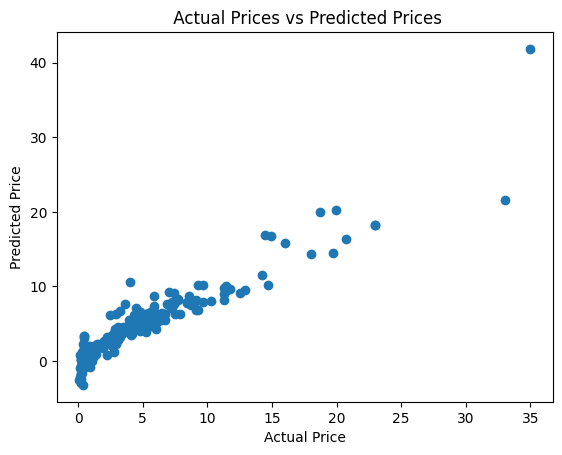

In [ ]:
plt.scatter(yc_train, Yc_train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

write about r2 squared error

In [ ]:
# prediction on test data
yc_pred = predictor.predict(Xc_test)

In [ ]:
r2 = r2_score(yc_test, yc_pred)
print("R squared Error using manual calculation: ", r2)

R squared Error using manual calculation:  0.8468053957655798


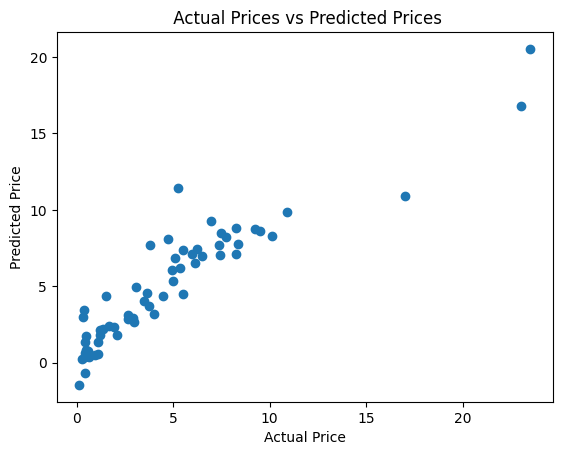

In [ ]:
plt.scatter(yc_test, yc_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

wite about regularization from notion and compare them through performance

# Lasso Regularization

In [ ]:
lass_reg_model = Lasso(random_state=42)

lass_reg_model.fit(Xc_train,yc_train)

# prediction on Training data
yc_train_pred = lass_reg_model.predict(Xc_train)

r2 = r2_score(yc_train, yc_train_pred)
print("R squared Error using manual calculation: ", r2)

R squared Error using manual calculation:  0.848030286813716


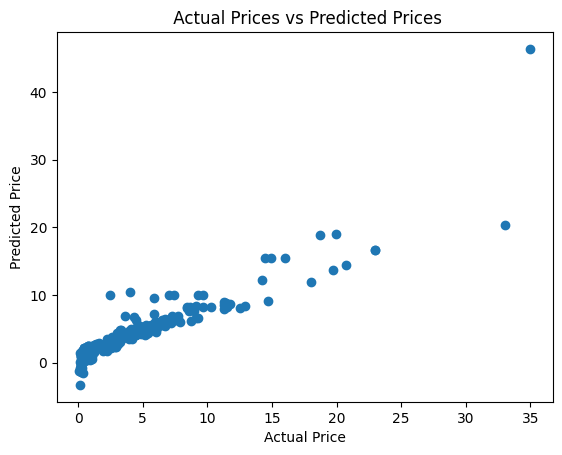

In [ ]:
plt.scatter(yc_train, yc_train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
# prediction on test data
ycc_pred = lass_reg_model.predict(Xc_test)

r2 = r2_score(yc_test, ycc_pred)
print("R squared Error using manual calculation: ", r2)


R squared Error using manual calculation:  0.798551246128469


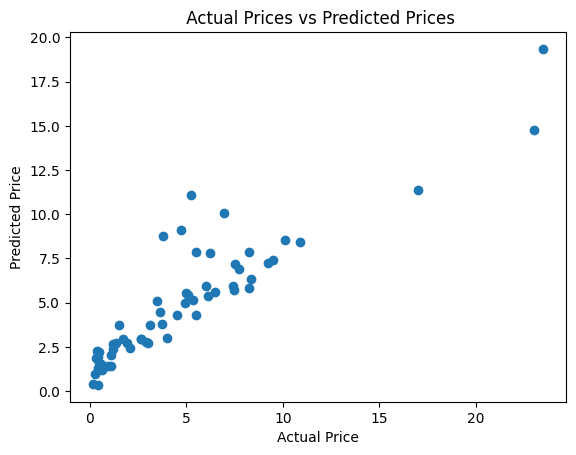

In [ ]:
plt.scatter(yc_test, ycc_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

# Ridge Regression

In [ ]:
ridge_reg_model = Ridge(random_state=42)

ridge_reg_model.fit(Xc_train, yc_train)

yc_train_pred_ridge = ridge_reg_model.predict(Xc_train)

r2_ridge = r2_score(yc_train, yc_train_pred_ridge)

print("R squared Error using Ridge Regression: ", r2_ridge)

R squared Error using Ridge Regression:  0.8839409196005682


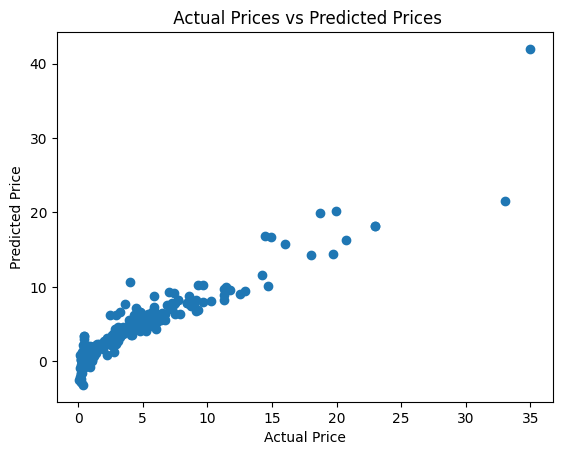

In [ ]:
plt.scatter(yc_train, yc_train_pred_ridge)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
ycc_pred_ridge = ridge_reg_model.predict(Xc_test)
r2_ridge = r2_score(yc_test, ycc_pred_ridge)
print("R squared Error using Ridge Regression: ", r2_ridge)

R squared Error using Ridge Regression:  0.847445192988107


Text(0.5, 1.0, 'Ridge: Actual Prices vs Predicted Prices')

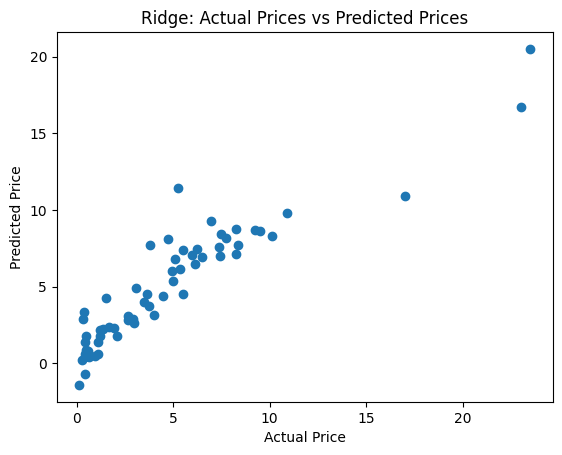

In [ ]:
plt.scatter(yc_test, ycc_pred_ridge)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Ridge: Actual Prices vs Predicted Prices")

# ElasticNet Regularization

In [ ]:
elastic_net_model = ElasticNet(random_state=42)

elastic_net_model.fit(Xc_train, yc_train)

yc_train_pred_elastic = elastic_net_model.predict(Xc_train)

r2_elastic = r2_score(yc_train, yc_train_pred_elastic)
print("R squared Error using ElasticNet Regression: ", r2_elastic)

R squared Error using ElasticNet Regression:  0.8515542497169762


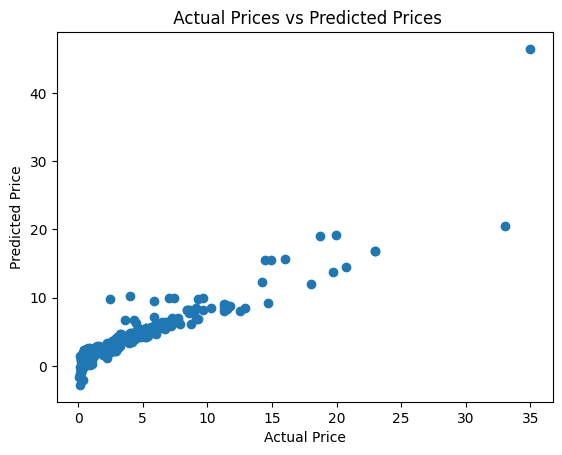

In [ ]:
plt.scatter(yc_train, yc_train_pred_elastic)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
ycc_pred_elastic = elastic_net_model.predict(Xc_test)
r2_elastic = r2_score(yc_test, ycc_pred_elastic)
print("R squared Error using ElasticNet Regression: ", r2_elastic)

R squared Error using ElasticNet Regression:  0.8087874396439665


Text(0.5, 1.0, 'ElasticNet: Actual Prices vs Predicted Prices')

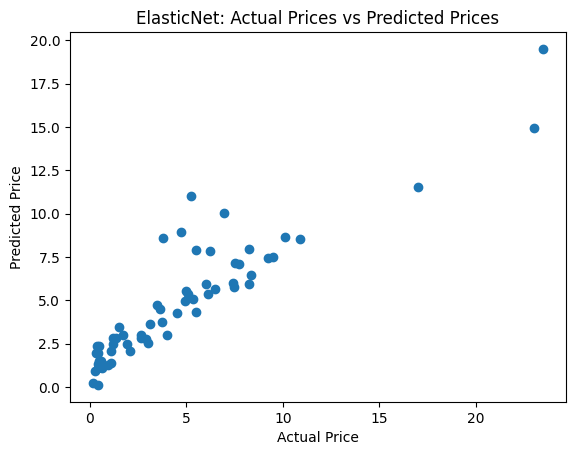

In [ ]:
plt.scatter(yc_test, ycc_pred_elastic)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("ElasticNet: Actual Prices vs Predicted Prices")
